<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem10_visual/images/visual.png?raw=true" height="400" width="700">
</center>

# <center> Визуализация данных в python </center>

Визуализация занимает важную часть в анализе данных. Представляя информацию в графическом виде, вы облегчаете процесс ее восприятия, что дает возможность выделять дополнительные закономерности, оценивать соотношения величин, быстрее доносить ключевые аспекты в данных.

Начнем с небольшой "памятки", о которой всегда нужно помнить при создании любых графиков.

## <center> Как визуализировать данные и заставить всех тебя ненавидеть </center>

1. Заголовок графика для слабаков. По графику всегда понятно, какие данные и явления он описывает.
2. Ни в коем случае не подписывай ни одной оси у графика. Пусть смотрящий развивает свою интуицую!
3. Единицы измерения совсем не обязательны. Какая разница, в чем измеряли количество - в людях или в литрах!
4. Чем меньше шрифт на графике, тем острее зрение смотрящего.
5. На одном графике нужно стараться уместить всю информацию, которая у тебя есть в датасете. С полными названиями, расшифровками, сносками. Чем больше текста - тем информативнее!
6. При любой возможности используйте 3D и спецэффекты, пусть знают, что ты — прирожденный дизайнер. К тому же, так будет меньше визуальных искажений.

Если серьезно, то обязательно посмотрите список рекомендованных материалов в конце ноутбука по правилам оформления графиков и работе с библиотеками для визуализации данных в Python.  

Основные библиотеки для визуализации в Python - это `matplotlib`, `seaborn`, `plotly`. Сегодня познакомимся с первыми двумя

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

# Продажи и оценки видеоигр

Работаем с датасетом по продажам и оценкам видео-игр. Датасет взят с [Кеггла](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

__Описание колонок:__
* `Name` $-$ название видеоигры
* `Platform` $-$ платформа, на которой игра была запущена
* `Year_of_Release` $-$ год релиза
* `Genre` $-$ жанр
* `Publisher` $-$ издатель
* `NA_Sales` $-$ объем продаж в Северной Америке (в млн штук)
* `EU_Sales` $-$ объем продаж в Евросоюзе (в млн штук)
* `JP_Sales` $-$ объем продаж в Японии (в млн штук)
* `Other_Sales` $-$ объем продаж в остальном мире (в млн штук)
* `Global_Sales` $-$ общий объем продаж (в млн штук)
* `Critic_Score` $-$ совокупный балл, составленный сотрудниками Metacritic
* `Critic_Count` $-$ кол-во критиков, оцениваемых игру
* `User_Score` $-$ совокупный балл, составленный подписчиками Metacritic (пользователями)
* `User_Count` $-$ кол-во пользователей, оцениваемых игру
* `Developer` $-$ ответственный за создание игры
* `Rating` $-$ рейтинг (Everyone, Teen, Adults Only и тд)

In [2]:
df = pd.read_csv('data/video_games_sales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


В данных много пропусков, поэтому давайте выкинем все пропущенные наблюдения. Также видим, что некоторые колонки pandas привел не к тому типу. Исправим это:

In [4]:
df = df.dropna()

df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [5]:
df.shape

(6825, 16)

## 1. Изучаем основы matplotlib на примере линейных графиков

Самый простой вариант создания графика в matplotlib - функция `plt.plot()`, которой мы передаем два аргумента - что положить на ось _x_, а что на _y_. Если у вас переменные в числовом формате, то без проблем получите линейный график (line plot)

`plt.plot(x = ___, y = ___)`

**Посмотрим на динамику продаж игр в мире по годам:**

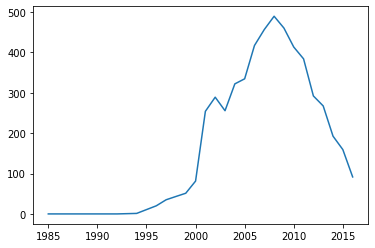

In [6]:
# агрегируем данные за год
gb = df.groupby('Year_of_Release').Global_Sales.sum()

# строим график
plt.plot(gb.index, gb.values);

### Задача №1:

Постройте один график, на котором будут отображаться сразу все показатели продаж (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales)

In [30]:
## Ваш код

В идеальной вселенной мы создаем графики функцией `subplots`, которая генерирует наш график в 2 переменные (обычно их называют fig и ax):

* `fig` отвечает за график в целом. Воспринимайте ее как файл, который хранит график как картинку.
* `ax` $-$ это ось координат, на которой мы собственно строим график. Все элементы графика хранятся как раз в ней.

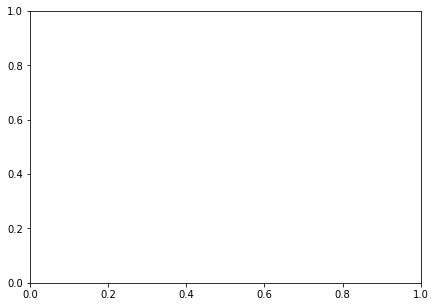

In [9]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) # создали полоино для графика из 1 ряда и 1 колонки (1 график)
                                           # figsize -это размер нашего прямоугольника в неочевидных единицах. 
                                           # Какой размер удачный? экспериментируйте!

**Посмотрим на динамику продаж игр в мире по годам, но теперь используем `subplots`**

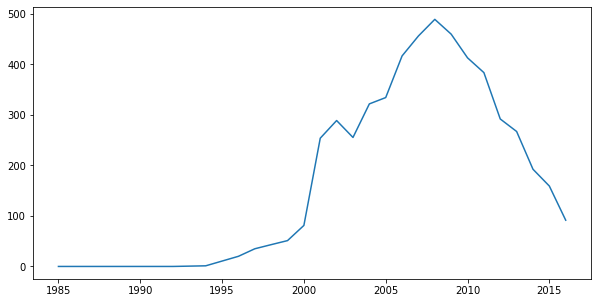

In [10]:
# агрегируем данные за год
gb = df.groupby('Year_of_Release').Global_Sales.sum()

# строим график
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(gb.index, gb.values);

В переменной _ax_ на самом деле лежит куча методов, которые позволяют сделать график более приятным. Посмотрим на несколько из них:

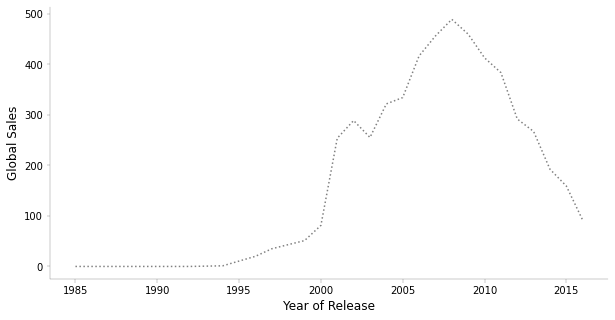

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) 

# параметры самого графика (цвет линии, стиль и т.д.) определяем как параметры в методе plot()
# меняем цвет и стиль линии на пунктир. Matplotlib знает некоторые стандартные цвета, и их можно задать прямо словом
# так же можно передать hex цвет. Например, #8c92ac
ax.plot(gb.index, gb.values, color = 'grey', ls = ':')  


# если вы обратили внимание, то в нашем самом первом графике шкала с годами сломамлась и стала float. Matplotlib принудительно 
# делает x непрерывной переменной для линейного графика. Мы хотим оставить шкалу год в целых числах.
ax.locator_params(integer=True) 

# называем шкалы x и y, выбираем размер шрифта.
ax.set_xlabel('Year of Release', fontsize=12)
ax.set_ylabel('Global Sales', fontsize=12)

# делаем правую и верхнюю границу графика невидимыми
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# делаем засечки на шкалах x и y потоньше
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)

# уменьшаем толщину оставших границ графика с помощью цикла 
# (можно и без цикла отдельной строкой для каждой границы, как делали выше)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)

### Создаем систему графиков

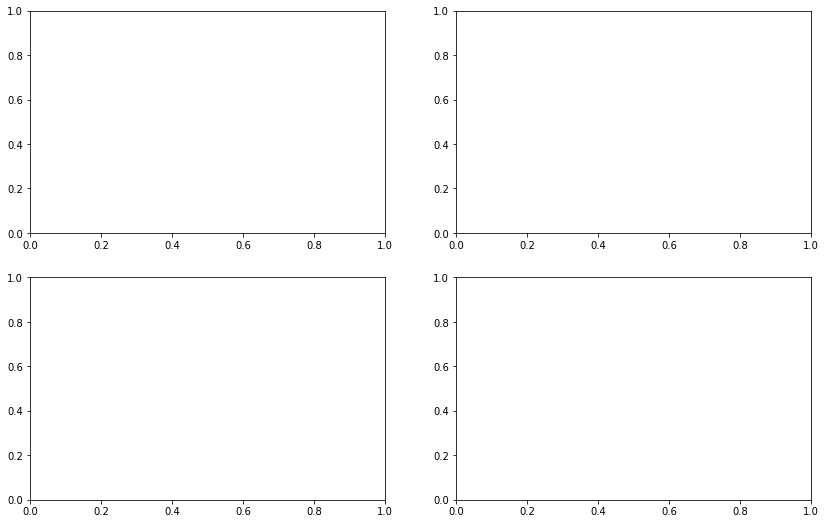

In [13]:
fig, ax = plt.subplots(2,2, figsize=(14,9)) # увеличиваем количество объектов до двух рядов и двух колонок.

Теперь у нас есть четыре графика! 

Объект _ax_ в данном случае **становится матрицой**. И чтобы обратиться к каждому графику, нужно обратиться к нему по индексу из _ax_.

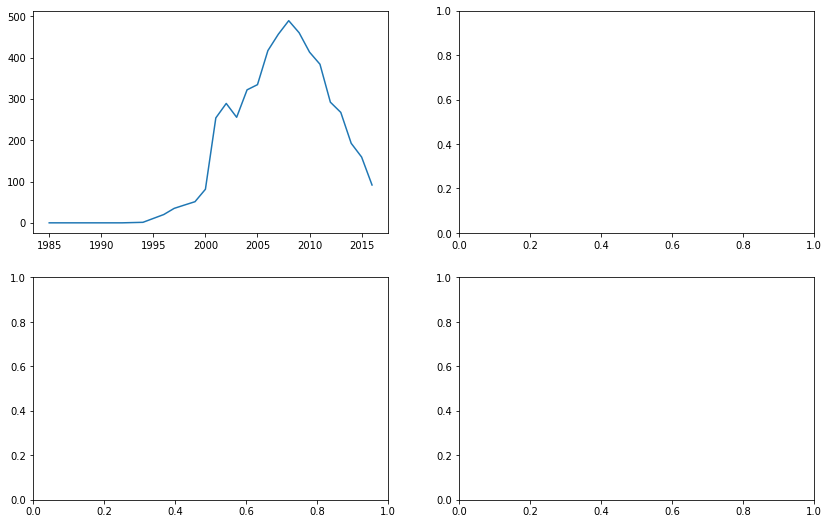

In [14]:
fig, ax = plt.subplots(2,2, figsize=(14,9))

ax[0][0].plot(gb.index, gb.values);

Ниже посмотрим как с помощью цикла for можно применить какую-то модификацию ко всем графикам системы.

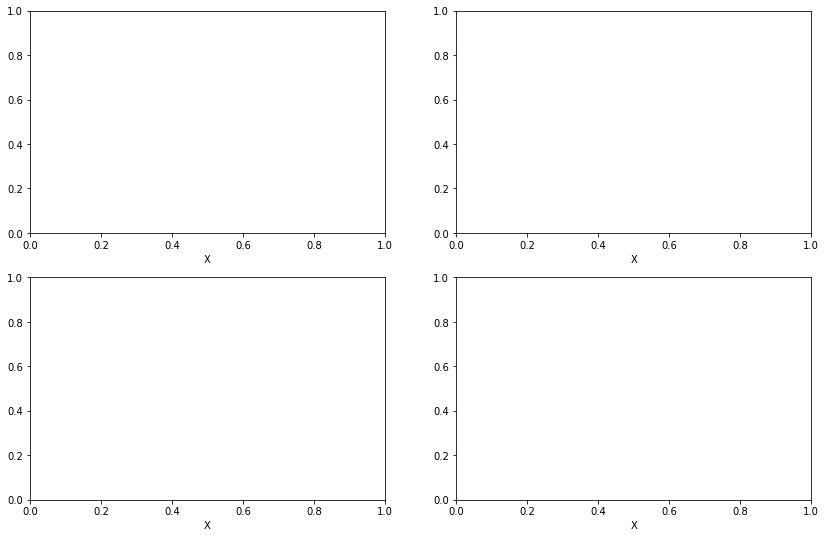

In [15]:
fig, ax= plt.subplots(2, 2, figsize=(14,9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('X')

### Задача №2:

Создайте систему графиков, у которой:
* на 1ом графике изображены продажи в Северной Америке (`NA_Sales`);
* на 2ом продажи в Европейском Союзе (`EU_Sales`);
* на 3ем продажи в Японии (`JP_Sales`)
* на 4ом графике все 3 линии вместе;
* Каждый график должен быть разного цвета. В четвертом графике - каждый график должен быть такого же цвета, как и в своей ячейке + 4ый график должен иметь легенду
* В заголовке к каждому графику напишите то, что стоит у него по оси _y_

In [31]:
## Ваш код

## 2. Графики для категориальных переменных

**Посмотрим на кол-во игр за каждый год с помощью столбчатой диаграммы:**

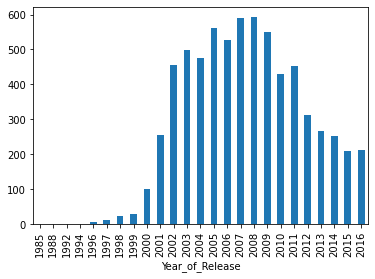

In [17]:
df.groupby('Year_of_Release').Name.count().plot(kind='bar');

**Посмотрим отдельно на кол-во игр жанра Sports и Action за последние 5 лет. Сделаем двойную диаграмму и развернем ее горизонтально**

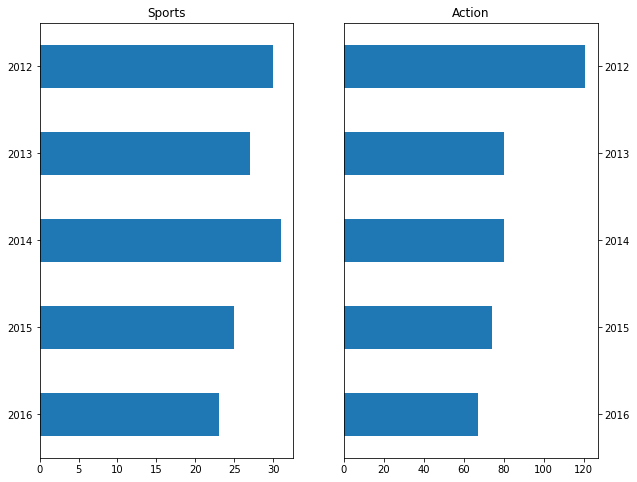

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

gb_sports = df[df.Genre=='Sports'].groupby('Year_of_Release').Name.count().tail(5).sort_index(ascending=False)
gb_sports.plot(kind='barh', ax=ax[0])
ax[0].set_title('Sports')

gb_act = df[df.Genre=='Action'].groupby('Year_of_Release').Name.count().tail(5).sort_index(ascending=False)
gb_act.plot(kind='barh', ax=ax[1])
ax[1].set_title('Action')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False) # убираем подпись к шкале, которая генерируется автоматически

Подумайте, чем плох такой график?

### Задача №3:

С помощью двух вертикальных столбчатых диаграмм выведите среднюю оценку критиков и пользователей игр различных рейтингов. 

In [32]:
## Ваш код

### Задача №4:

В виде горизонтальной столбчатой диаграммы выведите топ-5 девелоперов с наибольшей средней оценкой от критиков. Рядом выведите диаграмму их самой успешной игры по общим продажам. 

In [33]:
## Ваш код

### Задача №5:

Сравните оценки игр от критиков для топ-5 крупнейших игровых платформ (по кол-ву игр) с помощью boxplot из пакета seaborn.

In [34]:
## Ваш код

## 3*. Мультивариативный график рассеяния

Сейчас будем работать с наборам данных, который содержит информацию о количестве преступлений в штатах США в 2005 году.

In [22]:
crimes = pd.read_csv('data/crimeRatesByState2005.tsv', sep='\t')
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


График рассеяния (scatter plot) $-$ это такой график, у которого по оси _x_ и _y_ отложены непрерывные переменные. График состоит из точек, каждая из которых отвечает за свое наблюдение. 

Посмотрим на график зависимостей убийств от краж со взломом (burglary)

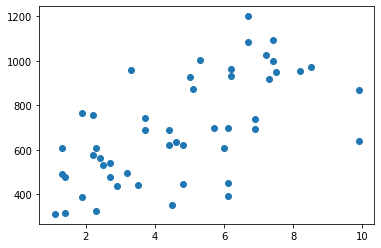

In [23]:
fig, ax = plt.subplots() 
ax.scatter(crimes['murder'], crimes['burglary']);

Здесь каждая точка отвечает за свой штат. По оси _x_ мы видим сколько в штате было убийств, а по оси _y_ сколько краж со взломом

Попробуем на график добавить дополнительную информацию, например, в качестве размера точки обозначим кол-во населения

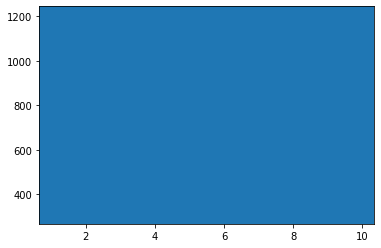

In [24]:
fig, ax = plt.subplots()

# добавляем параметр s (size) и говорим, какая переменная будет за него отвечать
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']);

Размер населения такой большой, что точка захватила всю область координат. Давайте попробуем нашу переменную масштабировать - нам же важны относительные размеры штатов относительно друг друга, а не абсолютные значения. Значения маштабирования тоже выбираем экспериментально: то, что лучше выглядит и более информативно.

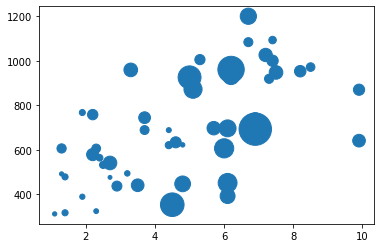

In [25]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000);

Отлично, однако следующая проблема - слияние точек. Давайте добавим параметр прозрачности, чтобы было видно, где они накладываются друг на друга.

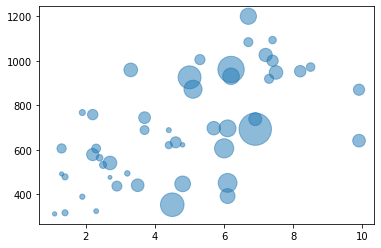

In [26]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5);

Добавим теперь еще какую-нибудь переменную (например, robbery) и засунем ее в параметр цвета 

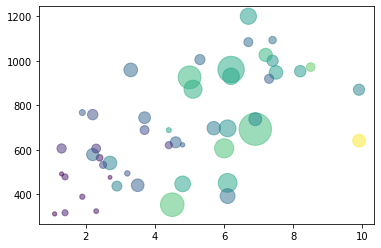

In [27]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5, 
           c = crimes['Robbery']); # задаем новый аргумент c (color) и присваиваем ему значение переменной

Осталось узнать, что значит какой цвет. Для этого нужно сохранить график в переменную и передать ее как аргумент функции `colorbar()`. Также можем поменять цветовую шкалу с помощью аргумента cmap.

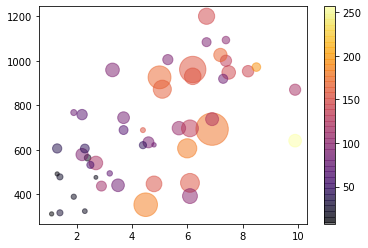

In [28]:
fig, ax = plt.subplots()
color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5, cmap = 'inferno',
           c = crimes['Robbery'])
plt.colorbar(color_graph);

Последнее что тут сделаем - это подпишем штаты

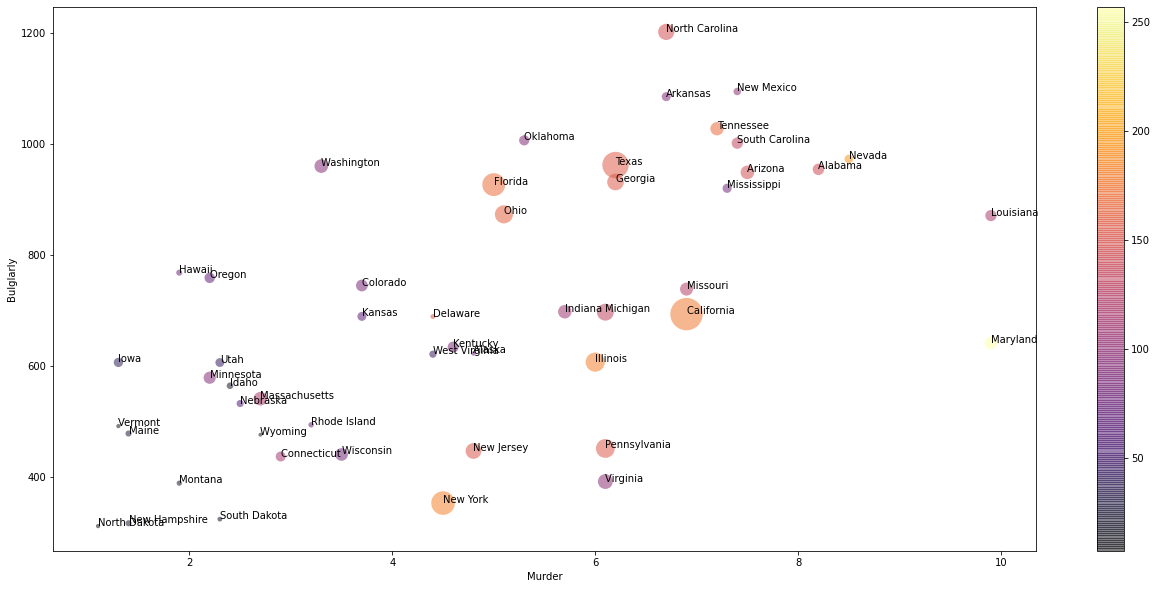

In [29]:
fig, ax = plt.subplots(figsize = (22,10))

color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, 
                         c = crimes['Robbery'], cmap = 'inferno', alpha = 0.5, linewidth = 0)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('Murder', fontsize = 10)
ax.set_ylabel('Bulglarly', fontsize = 10)

for i, state in enumerate(crimes['state']):  # с помощью enumerate создаем из колонок с названиями штатов объект кортежей вида индекс - название штата.
    ax.annotate(state, (crimes['murder'][i], crimes['burglary'][i]), fontsize = 10) # используем метод annotate, которому говорим, что нужно брать имя штата
                                                                                    # из кортежа, который создали с помощью enumerate, а координаты подписи задаем через
                                                                                    # значения наших переменных x и y для нужного индекса из объекта enumerate (обращается к нужному
                                                                                    # ряду в датафрейме)
                
plt.colorbar(color_graph);